# Financial Time Series

In this notebook, we demonstrate the use of Topological Data Analysis (TDA) methods in predicting the *crysis* in technological industries.

For this purpose, we use the stock market values of six tech companies over the period from 2019 to 2024. The companies involved include: *Apple*, *Tesla*, *Nvidia*, *Microsoft*, *Google* and *Meta*.  
The data used in this notebook is obtained from the Kaggle platform and can be found [here](https://www.kaggle.com/datasets/saketk511/2019-2024-us-stock-market-data).

The main idea follows that of the paper *Topological Data Analysis of Financial Time Series: Landscapes of Crashes* by Marian Gidea and Yuri Katz, which can be found [here](https://arxiv.org/abs/1703.04385).

## Data preprocessing

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import gudhi
from gudhi.representations import Landscape

In [5]:
tech_columns = ['Apple_Price', 'Tesla_Price', 'Nvidia_Price', 'Microsoft_Price', 'Google_Price', 'Meta_Price']

data = pd.read_csv("Stock Market Dataset.csv")

tech_data = data[tech_columns]
dates = pd.to_datetime(data['Date'], dayfirst=True)

In [7]:
tech_data.head()

,Apple_Price,Tesla_Price,Nvidia_Price,Microsoft_Price,Google_Price,Meta_Price
0,185.85,187.91,661.60,411.22,142.38,474.99
1,186.86,188.86,630.27,403.78,141.16,394.78
2,184.40,187.29,615.27,397.58,140.10,390.14
3,188.04,191.59,627.74,408.59,151.46,400.06
4,191.73,190.93,624.65,409.72,153.51,401.02


array([[<Axes: title={'center': 'Apple_Price'}>,
        <Axes: title={'center': 'Tesla_Price'}>],
       [<Axes: title={'center': 'Nvidia_Price'}>,
        <Axes: title={'center': 'Microsoft_Price'}>],
       [<Axes: title={'center': 'Google_Price'}>,
        <Axes: title={'center': 'Meta_Price'}>]], dtype=object)

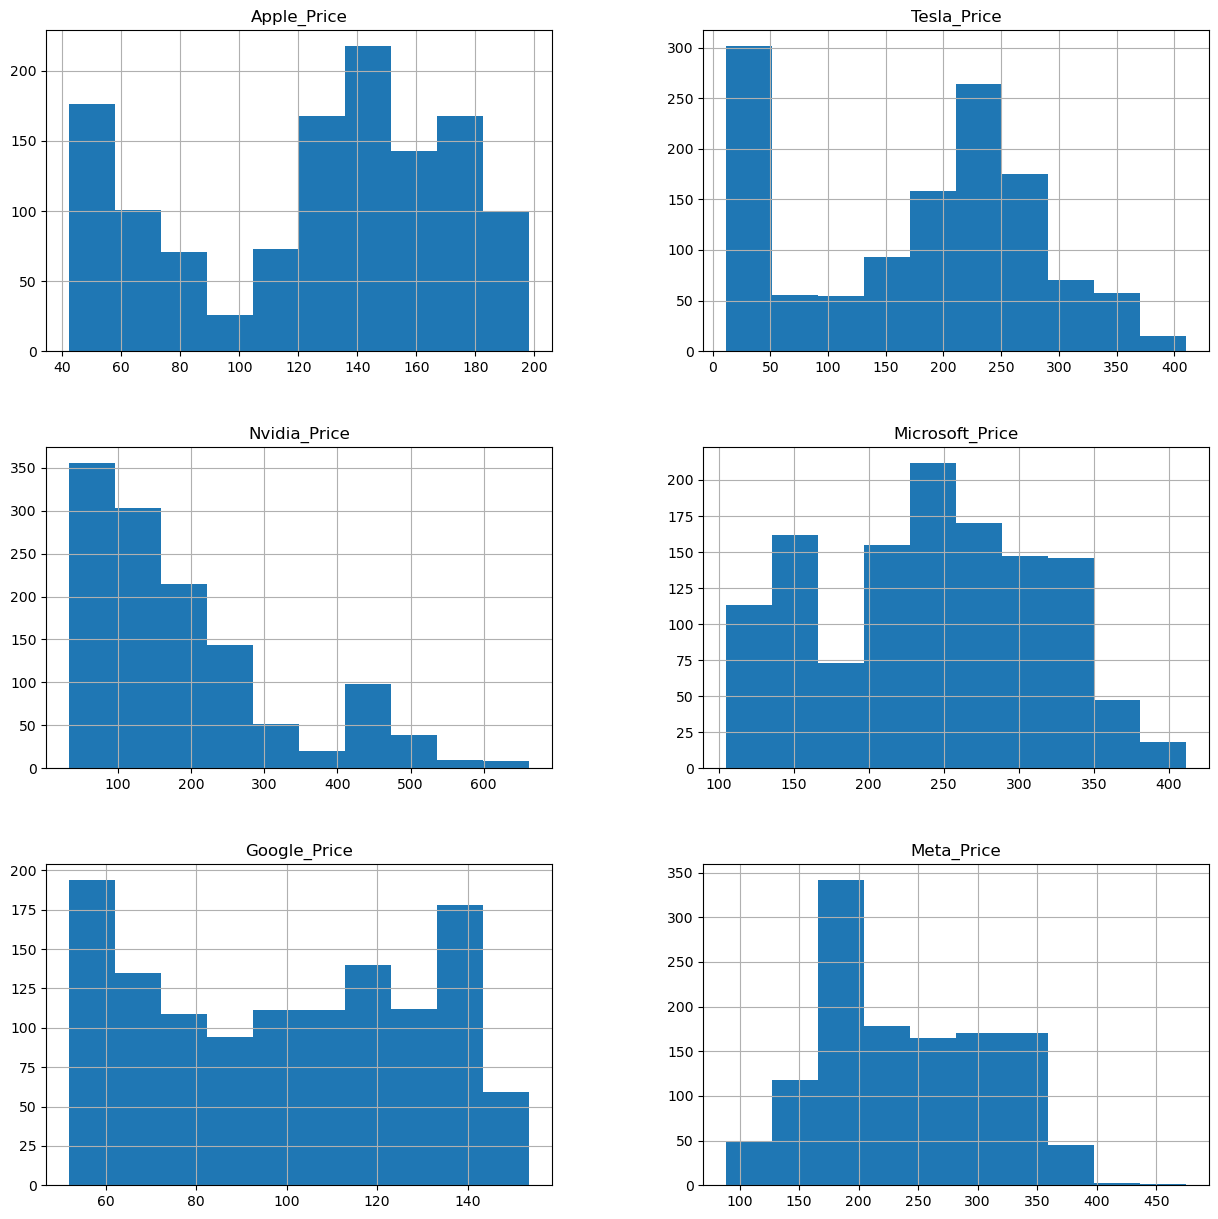

In [9]:
tech_data.hist(figsize=[15,15])

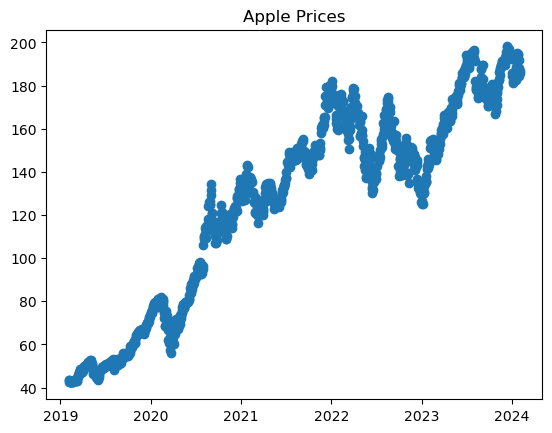

In [11]:
plt.plot_date(dates, tech_data['Apple_Price'])
plt.title('Apple Prices')
plt.show()

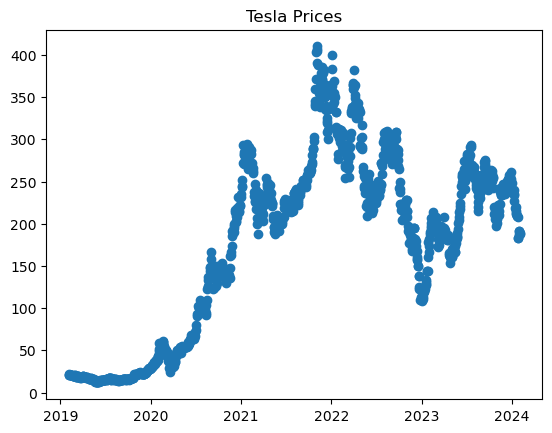

In [13]:
plt.plot_date(dates, tech_data['Tesla_Price'])
plt.title('Tesla Prices')
plt.show()

Based on the diagrams above, we see that the all of the prices varied significantly ove time.

In [16]:
processed_data = np.log(tech_data / tech_data.shift(1))

In [18]:
scaler = StandardScaler()
normed_data = scaler.fit_transform(processed_data)

## Computing $L^p$-norms of Persistence Landscapes

Given a $6$-dimensional time series (as in our case), we take a sliding window of size $w$. Hence, each window consists of $w$ $6$-dimensional points. For each window we compute the persistence diagram of the Vietoris-Rips complex on the points of the window. We then compute the $L^p$-norms (with $p=1,2$) of the persistence landscape of the persistence classes in the dimension $1$. Consequently, we obtain a series of $L^p$-norms of our sliding window. This data gives us an insight into the stability of the Stock Market.

**Why persistent landscapes?**  
Persistence landscapes are computed from persistence diagrams, and, although both persistence diagrams and landscapes admit a metric, persistence landscapes can be embedded into a Banach space, meaning that we can extract all of the standard statistical properties. For more information, see the original paper of Gidea and Katz.

In [21]:
lp1_norms = []
lp2_norms = []
window_size = 50

In [23]:
for i in range(len(normed_data) - window_size + 1):
    window = normed_data[i: i+window_size]

    rips_complex = gudhi.RipsComplex( points=window )
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    persistence_diagram = simplex_tree.persistence()

    persistence_landscape = Landscape(resolution=1000).fit_transform([simplex_tree.persistence_intervals_in_dimension(1)])

    lp1_norms.append( np.linalg.norm(persistence_landscape, ord=1) )
    lp2_norms.append( np.linalg.norm(persistence_landscape, ord=2) )

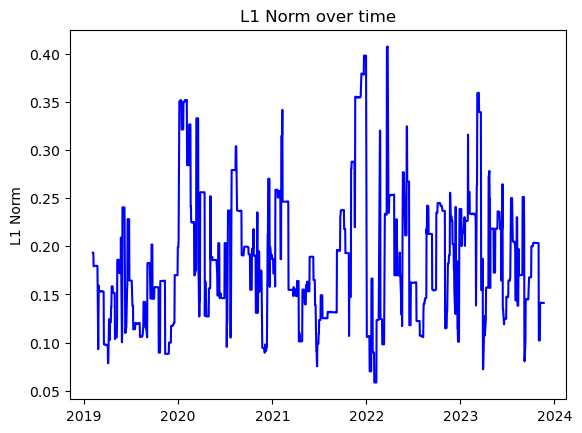

In [25]:
plt.plot_date(dates[window_size-1:], lp1_norms, 'b')
plt.ylabel("L1 Norm")
plt.title("L1 Norm over time")
plt.show()

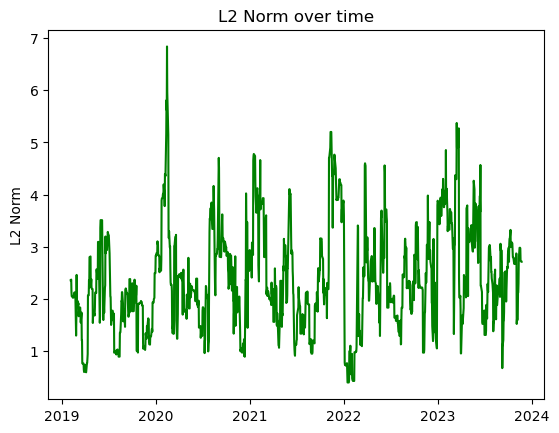

In [27]:
plt.plot_date(dates[window_size-1:], lp2_norms, 'g')
plt.ylabel("L2 Norm")
plt.title("L2 Norm over time")
plt.show()

## Conclusion

As evident from the graphs, we see a nocieable spike in the $L^2$-norm at the start of the 2020, which correlates with the Corona virus epidemic. Additionally, we see the slight spikes at the start of both 2022 and 2023. Unfortunately, the author of this notebook does not possess the necessary knowledge of the financial systems to explain them.  
Nevertheless, there is a reason to believe that $L^p$-norms can give an insight into the stability of the Stock Market.